# Noise-induced Transitions. 
## Explorations of noise induced order (NIO) and noise-induced chaos (NIC) with last models.
### Correct use of arbitrary precision float operations implemented with 'BigFloat' julia object as a wraper for the corresponding MPFR C library

## All calculations below are performed with 1024 bits (aobut 256 decimal figures) of precision.


# 1a. Noise-Induced Chaos (NIC) using BigFloat with 1024 bits

In [1]:
using Plots #calling the libraries for making plots

In [8]:
import Pkg; Pkg.add("PyCall"); using PyCall

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %Fetching: [======>                                  ]  13.7 %                          ]  35.0 %                 ]  55.7 %Fetching: [=============================>           ]  71.9 %>      ]  84.2 % Resolving package versions...
 Installed FFMPEG ─ v0.2.3
 Installed PDMats ─ v0.9.10
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [c87230d0] ↑ FFMPEG v0.2.2 ⇒ v0.2.3
  [90014a1f] ↑ PDMats v0.9.9 ⇒ v0.9.10
  Building FFMPEG → `~/.julia/packages/FFMPEG/bkWgb/deps/build.log`


┌ Info: Recompiling stale cache file /home/alvarodr/.julia/compiled/v1.0/PyCall/GkzkC.ji for PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
└ @ Base loading.jl:1190


In [2]:
function NICvlmlBig(epsil::BigFloat,n::Int64,exponentk::Int64,prec::Int64)
setprecision(prec) # Sets number of bits used in representing BigFloats
iters = collect(1:n-1)
d = 2.0^(-exponentk)
@show d
x = Array{BigFloat,1}(undef,n)
eRND = Array{BigFloat,1}(undef,n)
preLE = Array{BigFloat,1}(undef,n-1)
x[1] = rand(BigFloat)
@show x[1]
absd = BigFloat(abs(d))
    for j in iters
    xbfj = BigFloat(x[j])
    zro = BigFloat(0.0)
    one1 = BigFloat(1.0)
    oneovertwo = BigFloat(1/2)
    eRND[j] = epsil*(2*rand(BigFloat)-1)
        if xbfj < zro
            x[j+1] = d*x[j] + d + eRND[j]
            preLE[j] = log(BigFloat(absd))
            elseif xbfj >= zro  && xbfj < oneovertwo
            x[j+1] = 2*(1-d)*x[j] + d + eRND[j]
            preLE[j] = log(2*(1-absd))
            elseif xbfj >= oneovertwo  && xbfj <= one1
            x[j+1] = 2*(1-d)*(1-x[j]) + d + eRND[j]
            preLE[j] = log(2*(1-absd))
            elseif xbfj > one1
            x[j+1] = d*(1-x[j]) + d + eRND[j]
            preLE[j] = log(absd)
            else
            println("Breakpoint reached due to bad conditioning")
        end
    #@show preLE[j]
    end
    @show x[n]
    @show length(preLE)
    @show length(x)
    @show preLE[n-1]
    #LyapExp = sum(preLE)/length(preLE)
    lag = 1000
    LyapExp = sum(preLE[n-lag:n-1])/length(preLE[n-lag:n-1])
    @show LyapExp
    #hist(x)
    return x
    #return preLE 
    #return LyapExp
end



NICvlmlBig (generic function with 1 method)

## Next, we evaluate the function NIC_vlmlBig() for different sets of parameters, compute the corresponding histograms and compare the outupts

## 1st  RUN
### Precision: $1024$ bits; iterations: $10^7$; Noise Level, $\epsilon$ : $0$; $d = 2^{-7}$ 

In [3]:
#PARAMETERS
epsilon= BigFloat(0.0)
iters = 10000000
precision=1024
exponent=7
xorb1024_1e7_epsZero_= NICvlmlBig(epsilon,iters,exponent,precision);

d = -0.0078125
x[1] = 2.322462144837774333124588792880865480612082535547579961510397940286264279865540231935682126692798072074304622721777700876125531268736774633820522126920804171504873936550836173543365020936020397052728279860395645531146559968001922076979787049232367617873837353209312945025436139539718661774785356950840377268516e-01
x[n] = -7.751937984496124031007751937984496124031007751937984496124031007751937984496124031007751937984496124031007751937984496124031007751937984496124031007751937984496124031007751937984496124031007751937984496124031007751937984496124031007751937984496124031007751937984496124031007751937984496124031007751937984496125e-03
length(preLE) = 9999999
length(x) = 10000000
preLE[n - 1] = -4.85203026391961716592062485020723597652850094052178677884476006645375535378786300924104328897493081279401036714399480013579864165030691389922869526144553173351509299579860004633214927036724171429786345080755148568667384332620877102452445608867313897668118065317104966728456649

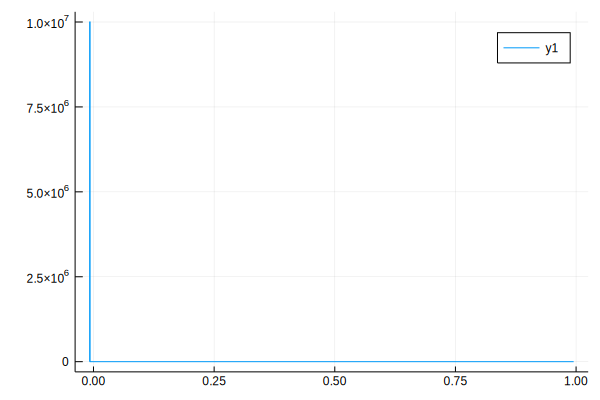

In [4]:
histogram(xorb1024_1e7_epsZero_,bins=1000)

## 2nd  RUN
### Precision: $1024$ bits; iterations: $10^7$; Noise Level, $\epsilon$ : $1e-5$; $d = 2^{-7}$ 

In [5]:
#PARAMETERS
epsilon= BigFloat(0.00001)
iters = 10000000
precision=1024
exponent=7
xorb1024_1e7_eps1em5= NICvlmlBig(epsilon,iters,exponent,precision);

d = -0.0078125
x[1] = 2.93802740336695599088335129810955895373823328639880597245189626412852917492529128807572617680936041648970348835183480596744328977541638949016299405424739126955295036562081941961117297425070581709436079153137701950200274286864485557012005372648455780189548709545837583808179362305288013627438862387420478909209e-01
x[n] = -7.742138374136558745353086160596229333027524156339281358909548149452707708490925143145085547444175925250080038878993017663367652349984740787553606086502920291888210442207516284024148639138647393055970445150144211092382369695041613319433518803757582092742309314511050144011535074749370617313877359750987316125588e-03
length(preLE) = 9999999
length(x) = 10000000
preLE[n - 1] = -4.852030263919617165920624850207235976528500940521786778844760066453755353787863009241043288974930812794010367143994800135798641650306913899228695261445531733515092995798600046332149270367241714297863450807551485686673843326208771024524456088673138976681180653171049667284566498

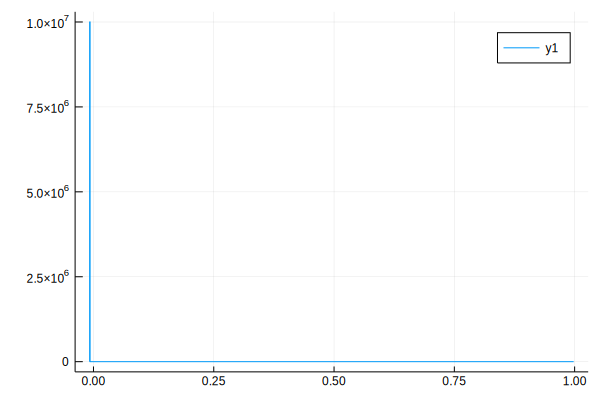

In [7]:
histogram(xorb1024_1e7_eps1em5,bins=1000)

## 3rd  RUN
### Precision: $1024$ bits; iterations: $10^7$; Noise Level, $\epsilon$ : $1e-3$; $d = 2^{-7}$ 

In [11]:
#PARAMETERS
epsilon= BigFloat(0.001)
iters = 10000000
precision=1024
exponent=7
xorb1024_1e7_eps1em3= NICvlmlBig(epsilon,iters,exponent,precision);

d = -0.0078125
x[1] = 5.214497246117131261554328479678614030066389583291432454919866594525382351369505153533033261743963677309457216167717080314654971527192637506991356033572316804036645124345149461613452991863621437331355033364666076872100683108744325518414874706322039702393428564302783844390663415481397274979661696629831853362666e-02
x[n] = -7.513834585080436870057753010360366779731087430540133963484800765568479415679540839532017276758797188447509017045995477173236794243677188262541588214391053870969368850840257703197433038261932382611743172581091397441556140315626197029007759276542579340526003242974696302300657514851288052331175658717732500398203e-03
length(preLE) = 9999999
length(x) = 10000000
preLE[n - 1] = -4.85203026391961716592062485020723597652850094052178677884476006645375535378786300924104328897493081279401036714399480013579864165030691389922869526144553173351509299579860004633214927036724171429786345080755148568667384332620877102452445608867313897668118065317104966728456649

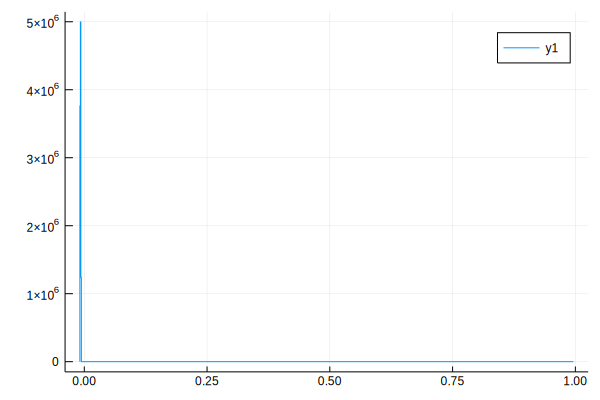

In [12]:
histogram(xorb1024_1e7_eps1em3,bins=1000)

## 4th  RUN
### Precision: $1024$ bits; iterations: $10^7$; Noise Level, $\epsilon$ : $1e-2$; $d = 2^{-7}$ 

In [14]:
#PARAMETERS
epsilon= BigFloat(0.01)
iters = 10000000
precision=1024
exponent=7
xorb1024_1e7_eps1em2= NICvlmlBig(epsilon,iters,exponent,precision);

d = -0.0078125
x[1] = 3.80158127439090954366270444628833197800766422482993177703066209316965415464389173454998023600418657201034288577746236293916066922887840143833796474747452362821288826498173292343974118467455919366029574289119542200783280667332974860911677803100937790587095543437138211515572234602519883884253342225009958565569e-02
x[n] = -1.610381120519758824497237639083951922712542354119007632694045302171324354924980411315157338973435296852667218292054318151576406426863090062891435088164505811249966925819931672674489683187805204769373970895197454578140025987845696575912079745181446971167822232101634226251085540932336791795240609568056697393892e-02
length(preLE) = 9999999
length(x) = 10000000
preLE[n - 1] = -4.852030263919617165920624850207235976528500940521786778844760066453755353787863009241043288974930812794010367143994800135798641650306913899228695261445531733515092995798600046332149270367241714297863450807551485686673843326208771024524456088673138976681180653171049667284566498

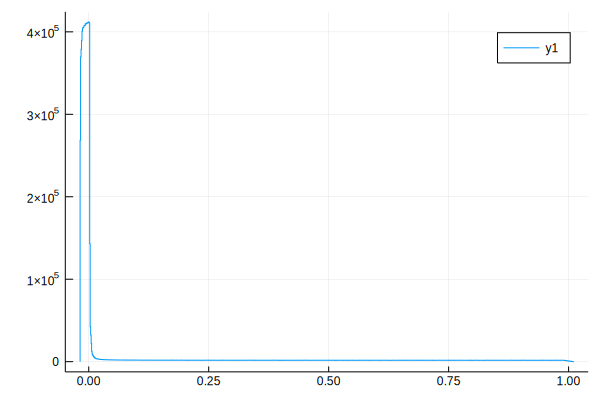

In [15]:
histogram(xorb1024_1e7_eps1em2,bins=1000)

## 5th  RUN
### Precision: $1024$ bits; iterations: $10^7$; Noise Level, $\epsilon$ : $0.012$; $d = 2^{-7}$ 

In [17]:
#PARAMETERS
epsilon= BigFloat(0.012)
iters = 10000000
precision=1024
exponent=7
xorb1024_1e7_eps0p012= NICvlmlBig(epsilon,iters,exponent,precision);

d = -0.0078125
x[1] = 8.389737732668709679542303419424222264903960390100474085696268278152216483586389687728612907882146464550406452395278103504082465744121980862157783391313608938890258246737611705218453267309544178250607311078781873895951957204061612965407446660601005046523414921123428211657703323194349830673970585277647228224558e-01
x[n] = -7.176322460669786991330415152840242637516159794087631871474242384792596536755269964201967942628571419502530914762901476712004513467358843637089572084888485777909912914104528305340410934551085924041470856827558244143621546663571774117276314660413263697795390204809948788048778051314661508326358738449476114056953e-03
length(preLE) = 9999999
length(x) = 10000000
preLE[n - 1] = -4.85203026391961716592062485020723597652850094052178677884476006645375535378786300924104328897493081279401036714399480013579864165030691389922869526144553173351509299579860004633214927036724171429786345080755148568667384332620877102452445608867313897668118065317104966728456649

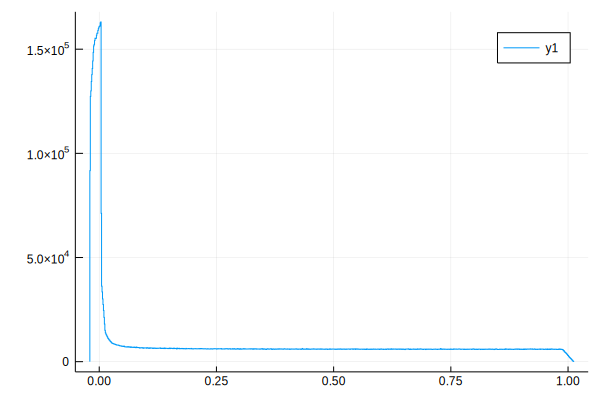

In [18]:
histogram(xorb1024_1e7_eps0p012,bins=1000)

## 6th  RUN
### Precision: $1024$ bits; iterations: $10^7$; Noise Level, $\epsilon$ : $0.015$; $d = 2^{-7}$ 

In [20]:
#PARAMETERS
epsilon= BigFloat(0.015)
iters = 10000000
precision=1024
exponent=7
xorb1024_1e7_eps0p015= NICvlmlBig(epsilon,iters,exponent,precision);

d = -0.0078125
x[1] = 4.122258307847245734610611974388350873079221671930472286879045172111305956025854809953804029951495546640383641451224351746321570666135912146364092920456523666656307902492311969616067785478740466462831383698515515171450085137775245537788551062858488930608956169432192056132962436592790417081389069838545955189996e-01
x[n] = 7.877989084734212000760751574427168465984657743920465183452098357650514835208442512768418743110348084219237575512880110036604713518863276781510608816821901717157761155889605535491126746041485056882101848518204182667403579444722048006067683327476834110216021180096697177904984444692641239987784005845830454254755e-01
length(preLE) = 9999999
length(x) = 10000000
preLE[n - 1] = 6.8530400309891941654404807896723298642090831776455423818318515089682352991840708411071515762399120887044116082965184690325042198447655241423367033857281837093626722593222864772329042622832756434019161658156775735275965314379470560593026393714403119571086631250693865086129126732

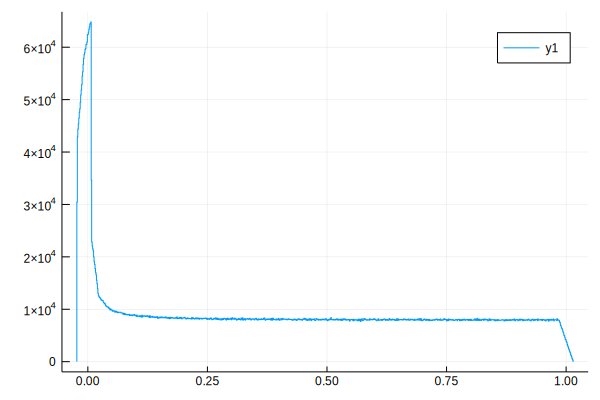

In [22]:
histogram(xorb1024_1e7_eps0p015,bins=1000)

## 7th  RUN
### Precision: $1024$ bits; iterations: $10^7$; Noise Level, $\epsilon$ : $0.02$; $d = 2^{-7}$ 

In [26]:
#PARAMETERS
epsilon= BigFloat(0.02)
iters = 10000000
precision=1024
exponent=7
xorb1024_1e7_eps0p02= NICvlmlBig(epsilon,iters,exponent,precision);

d = -0.0078125
x[1] = 4.771900745254573954976731822907044508637878616642442278096229658618875691064838381097396498812943737985181753107894910113360317169061753945926289675314903853892557358564833115317250704476543087893794499410410296821154289289377596835669930481539850278528611961745695697839628308040909800211347539816543705745927e-01
x[n] = 3.652414224576295551459208020554759306754263871643324897099475575049844520163891049272705837769674184494964043935026532583944287027987212820400682682752189353224272710174873818237094019479894473204646953126026442750998885212379716136316436854670382052009288247338056540893293258326558696706712647561363089641407e-01
length(preLE) = 9999999
length(x) = 10000000
preLE[n - 1] = 6.8530400309891941654404807896723298642090831776455423818318515089682352991840708411071515762399120887044116082965184690325042198447655241423367033857281837093626722593222864772329042622832756434019161658156775735275965314379470560593026393714403119571086631250693865086129126732

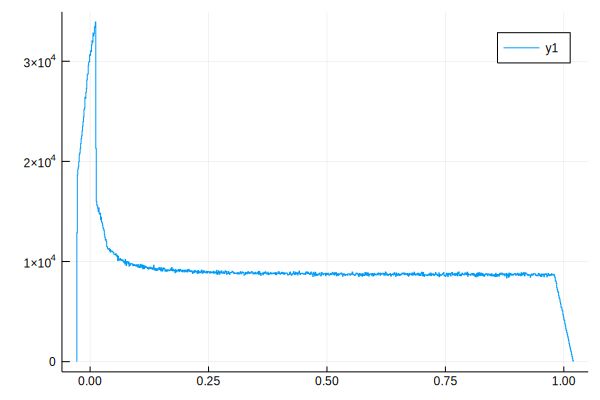

In [27]:
histogram(xorb1024_1e7_eps0p02,bins=1000)

# Observations regarding 1024 bits calculations above

## 1. There is not a considerable difference regarding the shape of the distributions compared to those obtained with floating point reals of 64 bits of precision. Please consult slides.

## 2. For noise level $\epsilon \lesssim 0.012 $ Lyapunov exponent values do not differ appreciably from those of 64 bits of precision.
## Nevertheless, for $\epsilon > 0.012 $, a considerable difference is appreciated in the Lyapunov exponent results:

| $\epsilon$      | $\lambda$ (1024) |   $\lambda$ (64)  |
|:---------------:|:----------------:|:------------------|
| 0.0000000000... | -4.8520302639... |  same             |
| 0.0000010000... | -4.8520302639... |  same             |
| 0.0010000000... | -4.8520302639... |  same             |
| 0.0100000000... | -3.7296126080... |  similar          |
| 0.0120000000... | -1.0318233531... |  similar          | 
| 0.0150000000... |  1.2935564269... |  $\simeq 0$       |
| 0.0200000000... |  3.6358488218... |  $\simeq 0.34$    |

# A plot of Lyapunov exponent, $\lambda$ vs. Noise level, $\epsilon$ with high precision, will be coming soon.

# Also coming soon, there will be the analysis of different models (some discussed after Trieste with Yuzuru) with the required precision. 